## **Applying the concept of PCA using MNIST dataset**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
data = pd.read_csv('/content/drive/MyDrive/100days of ML datasets/train.csv')

In [42]:
data.shape

(42000, 785)

In [43]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
data.sample(8)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
23149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22082,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2248,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33535,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22226,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8209,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21325,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30254,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data.shape

(42000, 785)

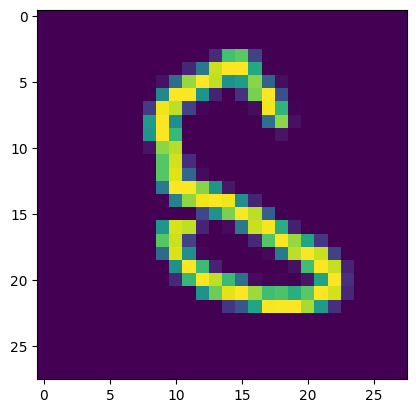

In [47]:
plt.imshow(data.iloc[12321, 1:].values.reshape(28,28))

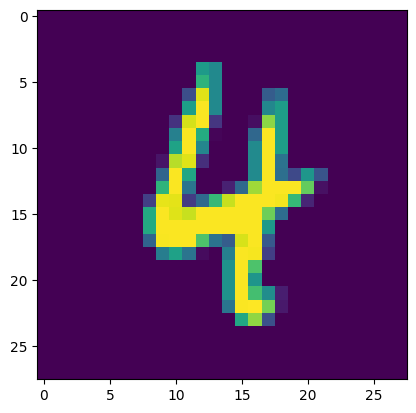

In [48]:
plt.imshow(data.iloc[25921, 1:].values.reshape(28,28))

### **Checking accuracy before applying PCA**

In [49]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(33600, 784)

In [52]:
y_train.shape

(33600,)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start) #Calculating Time taken to fit the model and to train the model

26.454707860946655


#### **Calculating the accuracy score**

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9648809523809524

### **Checking accuracy after applying PCA(reduction of dimensions)**

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Using PCA**

In [60]:
from sklearn.decomposition import PCA #Findng the eigen vectors and eigen values step
pca = PCA(n_components=100)

In [61]:
X_train_trf = pca.fit_transform(X_train) #Shifting towards the optimal axis
X_test_trf = pca.transform(X_test)

In [62]:
X_train_trf.shape

(33600, 100)

In [63]:
knn = KNeighborsClassifier()

In [64]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [65]:
y_pred = knn.predict(X_test_trf)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9541666666666667

In [69]:
for i in range(1, 785):
  pca = PCA(n_components=i)
  X_train_trf = pca.fit_transform(X_train) #Shifting towards the optimal axis
  X_test_trf = pca.transform(X_test)
  X_train_trf.shape
  knn = KNeighborsClassifier()
  knn.fit(X_train_trf, y_train)
  y_pred = knn.predict(X_test_trf)
  print(accuracy_score(y_test, y_pred))


0.2571428571428571
0.32357142857142857
0.5104761904761905
0.6664285714285715
0.7382142857142857
0.8227380952380953
0.8435714285714285
0.8722619047619048
0.8863095238095238
0.9061904761904762
0.9122619047619047
0.9182142857142858
0.929047619047619
0.934047619047619
0.9380952380952381
0.9377380952380953
0.94
0.94
0.9435714285714286
0.9436904761904762
0.944047619047619
0.9441666666666667
0.9445238095238095
0.945595238095238
0.9485714285714286
0.9475
0.9483333333333334
0.9477380952380953
0.9494047619047619
0.9510714285714286
0.9498809523809524
0.9514285714285714
0.9522619047619048
0.9507142857142857
0.9519047619047619
0.9508333333333333
0.9516666666666667
0.9530952380952381
0.9516666666666667
0.9525
0.9513095238095238
0.9525
0.9511904761904761
0.9528571428571428
0.9539285714285715
0.9530952380952381
0.9530952380952381
0.9539285714285715
0.9535714285714286
0.9539285714285715
0.9527380952380953
0.9539285714285715
0.9541666666666667
0.9547619047619048
0.9542857142857143
0.9541666666666667
0.9

KeyboardInterrupt: 